In [1]:
#This is based on:
# https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8759878
#codebase is from:
# https://www.kaggle.com/code/christianlillelund/classify-mnist-audio-using-spectrograms-keras-cnn/notebook

In [3]:
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
import os
import sys

In [3]:
#load a testsample
data = sio.loadmat('training/'+'train_ecg_00097'+'.mat')
signal = data['val'].T
print(signal.shape)
signal = np.ravel(signal)
print(signal.shape)
#plt.plot(signal) 
#plt.show()

(9000, 1)
(9000,)


In [5]:
fs = 300

The start and end index are:  900 8100
The new length of the signal is:  7200


<function matplotlib.pyplot.show(close=None, block=None)>

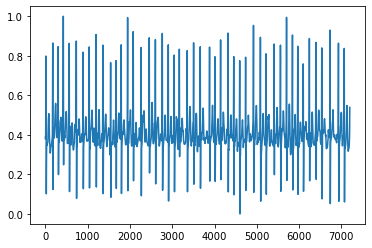

In [6]:
#cutoff the first and last 3 seconds of the signal
startindex = fs * 3 #seconds
endindex = signal.size - startindex
print("The start and end index are: ",startindex, endindex)
cutsignal = signal[startindex:endindex]
print("The new length of the signal is: ",cutsignal.size)

#normalise signalvalues
normalisesignal = (cutsignal - np.min(cutsignal)) / (np.max(cutsignal) - np.min(cutsignal))

#plot the cut and normalised signal
plt.plot(normalisesignal)
plt.show

(257, 32)

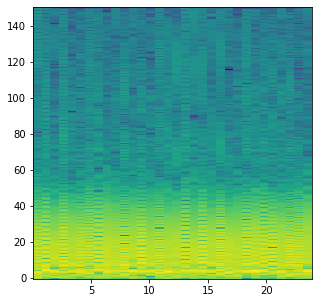

In [9]:
from scipy import signal as siglib
from scipy.fft import fftshift
np.set_printoptions(threshold=sys.maxsize)
#create spectogram of signal
#spectrum, freqs, t, im = plt.specgram(normalisesignal, NFFT=512, Fs=300, norm)

#plt.savefig('testfig.png')
plt.figure(figsize=(5,5))
f,t, Sxx = siglib.spectrogram(normalisesignal, fs=300, nfft=512)


plt.pcolor(t, f, 10*np.log10(Sxx))
Sxx.shape

In [208]:
os.remove('Preproces/N.npy')
os.remove('Preproces/A.npy')

with open('training/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        data = sio.loadmat('training/'+row[0]+'.mat')   # Import der EKG-Dateien
        signal = data['val'].T
        signal = np.ravel(signal)
        cutsignal = signal.copy()
        #print(cutsignal.shape)
        cutsignal.resize(9000,)
        normalisesignal = (cutsignal - np.min(cutsignal)) / (np.max(cutsignal) - np.min(cutsignal))
       # Sxx, f, t, im = plt.specgram(normalisesignal, NFFT=512, Fs=300, xextent=(0,30))
        f,t, Sxx = siglib.spectrogram(normalisesignal, fs=300, nfft=512)
        Sxx = 10*np.log10(Sxx+1e-12)
        Sxx = np.reshape(Sxx, (Sxx.shape[0],Sxx.shape[1],1))
        
        if row[1]=='N':                        # Zuordnung zu "Normal"
            if os.path.exists('Preproces/N.npy'):
                Narr=np.load('Preproces/N.npy')
                Narr=np.concatenate((Narr,Sxx), axis=-1)
                #print(Narr.shape)
                np.save('Preproces/N.npy', Narr) 
            else:
                np.save('Preproces/N.npy', Sxx)
       
        if row[1]=='A':                        # Zuordnung zu "Vorhofflimmern"
            if os.path.exists('Preproces/A.npy'):
                Aarr=np.load('Preproces/A.npy')
                Aarr=np.concatenate((Aarr,Sxx), axis=-1)
                np.save('Preproces/A.npy', Aarr) 
            else:
                np.save('Preproces/A.npy', Sxx)            
        
        del data, signal, cutsignal, normalisesignal, Sxx, f,t
        
        line_count = line_count + 1
        if (line_count % 100)==0:
            print(str(line_count) + "\t Dateien wurden verarbeitet.")

100	 Dateien wurden verarbeitet.
200	 Dateien wurden verarbeitet.
300	 Dateien wurden verarbeitet.
400	 Dateien wurden verarbeitet.
500	 Dateien wurden verarbeitet.
600	 Dateien wurden verarbeitet.
700	 Dateien wurden verarbeitet.
800	 Dateien wurden verarbeitet.
900	 Dateien wurden verarbeitet.
1000	 Dateien wurden verarbeitet.
1100	 Dateien wurden verarbeitet.
1200	 Dateien wurden verarbeitet.
1300	 Dateien wurden verarbeitet.
1400	 Dateien wurden verarbeitet.
1500	 Dateien wurden verarbeitet.
1600	 Dateien wurden verarbeitet.
1700	 Dateien wurden verarbeitet.
1800	 Dateien wurden verarbeitet.
1900	 Dateien wurden verarbeitet.
2000	 Dateien wurden verarbeitet.
2100	 Dateien wurden verarbeitet.
2200	 Dateien wurden verarbeitet.
2300	 Dateien wurden verarbeitet.
2400	 Dateien wurden verarbeitet.
2500	 Dateien wurden verarbeitet.
2600	 Dateien wurden verarbeitet.
2700	 Dateien wurden verarbeitet.
2800	 Dateien wurden verarbeitet.
2900	 Dateien wurden verarbeitet.
3000	 Dateien wurden ve

In [217]:
import pickle
def spectro(source, target, multi=True):
    id=0
    nnamez=dict()
    with open(source+'/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
        print(source+'/REFERENCE.csv')
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            data = sio.loadmat(source+'/'+row[0]+'.mat')   # Import der EKG-Dateien
            #print(source+'/'+row[0]+'.mat')
            signal = data['val'].T
            signal = np.ravel(signal)
            cutsignal = signal.copy()
            #print(cutsignal.shape)
            cutsignal.resize(9000,)
            normalisesignal = (cutsignal - np.min(cutsignal)) / (np.max(cutsignal) - np.min(cutsignal))
        # Sxx, f, t, im = plt.specgram(normalisesignal, NFFT=512, Fs=300, xextent=(0,30))
            f,t, Sxx = siglib.spectrogram(normalisesignal, fs=300, nfft=512)
            Sxx = 10*np.log10(Sxx+1e-12)
            Sxx = np.reshape(Sxx, (Sxx.shape[0],Sxx.shape[1],1))
            
            np.save(target+'/data/'+str(id), Sxx)
            
            if row[1]=='N': # Zuordnung zu "Normal"
                nlbl=np.asarray([1,0,0,0])
                np.save(target+'/label/'+str(id), nlbl)
        
            if row[1]=='A': 
                albl=np.asarray([0,1,0,0])                     # Zuordnung zu "Vorhofflimmern"
                np.save(target+'/label/'+str(id), albl)

            if multi==True:
                if row[1]=='~':                        # Zuordnung zu "Noise"
                    wlbl=np.asarray([0,0,1,0])
                    np.save(target+'/label/'+str(id), wlbl)

            
                if row[1]=='O':                        # Zuordnung zu "Other"
                    olbl=np.asarray([0,0,0,1])
                    np.save(target+'/label/'+str(id), olbl)
                         
            id=id+1
            del data, signal, cutsignal, normalisesignal, Sxx, f,t
            
            line_count = line_count + 1
            if (line_count % 100)==0:
                print(str(line_count) + "\t Dateien wurden verarbeitet.")
    

In [220]:
spectro('training','Preproces')

training/REFERENCE.csv
100	 Dateien wurden verarbeitet.
200	 Dateien wurden verarbeitet.
300	 Dateien wurden verarbeitet.
400	 Dateien wurden verarbeitet.
500	 Dateien wurden verarbeitet.
600	 Dateien wurden verarbeitet.
700	 Dateien wurden verarbeitet.
800	 Dateien wurden verarbeitet.
900	 Dateien wurden verarbeitet.
1000	 Dateien wurden verarbeitet.
1100	 Dateien wurden verarbeitet.
1200	 Dateien wurden verarbeitet.
1300	 Dateien wurden verarbeitet.
1400	 Dateien wurden verarbeitet.
1500	 Dateien wurden verarbeitet.
1600	 Dateien wurden verarbeitet.
1700	 Dateien wurden verarbeitet.
1800	 Dateien wurden verarbeitet.
1900	 Dateien wurden verarbeitet.
2000	 Dateien wurden verarbeitet.
2100	 Dateien wurden verarbeitet.
2200	 Dateien wurden verarbeitet.
2300	 Dateien wurden verarbeitet.
2400	 Dateien wurden verarbeitet.
2500	 Dateien wurden verarbeitet.
2600	 Dateien wurden verarbeitet.
2700	 Dateien wurden verarbeitet.
2800	 Dateien wurden verarbeitet.
2900	 Dateien wurden verarbeitet.


In [221]:
def load_batch(Xdat,Ydat,sbatch, ebatch):
    Xbat = []
    Ybat = []
    with open(Xdat, 'rb') as dat, open(Ydat, 'rb') as lab:
        for k in range(sbatch,ebatch):
            Xbat.append(pickle.load(dat))
            Ybat.append(pickle.load(lab))
            k=k+1
    Xbat=np.asarray(Xbat)
    Ybat=np.asarray(Ybat)
    return Xbat, Ybat



    

In [4]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size=32, dim=(257,40), n_channels=1,
                 n_classes=4, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, self.n_classes))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            #print(ID)
            # Store sample
            X[i,] = np.load('Preproces/data/' + str(int(ID)) + '.npy')
            # Store class
            y[i] = np.load('Preproces/label/' + str(int(ID)) + '.npy')

        return X, y

In [5]:
import random
from keras.models import Sequential
#from my_classes import DataGenerator

# Parameters
params = {'dim': (257,40),
          'batch_size': 16,
          'n_classes': 4,
          'n_channels': 1,
          'shuffle': True}

# Datasets
partition = np.arange(0,6000,1)
random.shuffle(partition)

# Generators
training_generator = DataGenerator(partition[0:5000], **params)
validation_generator = DataGenerator(partition[5000:6000], **params)

In [293]:
partition[0:2]

array([2307, 3572])

In [296]:
print(training_generator.__getitem__(0)[0][9].shape)

3976
0
3976
-23.260038454386248
1908
1
1908
-18.9085056543031
2833
2
2833
-13.105151086651745
2619
3
2619
-21.69312273965748
2206
4
2206
-13.71179002043672
996
5
996
-19.247913421460385
5509
6
5509
-14.774472738309193
3936
7
3936
-24.698733951047053
4758
8
4758
-22.59051132947048
4134
9
4134
-19.93602477575574
4651
10
4651
-13.10437208033614
3870
11
3870
-17.74709674254631
3729
12
3729
-13.121958834529952
3807
13
3807
-15.960509637813505
248
14
248
-18.529820441479345
2432
15
2432
-20.757407820506
(257, 40, 1)


In [93]:
Nclass = np.load('Preproces/N.npz')
Aclass = np.load('Preproces/A.npz')
Wclass = np.load('Preproces/W.npz')
Oclass = np.load('Preproces/O.npz')
print(Nclass.files)
print(Aclass.files)
print(Wclass.files)
print(Oclass.files)
#print(Nclass.pickle_kwargs())
Nclass.keys()
print(dict(Nclass.pickle_kwargs()))

['nnamez']
['arr_0', 'arr_1', 'arr_2', 'arr_3']
['arr_0', 'arr_1', 'arr_2', 'arr_3']
['arr_0', 'arr_1', 'arr_2', 'arr_3', 'arr_4']


TypeError: 'dict' object is not callable

In [210]:
Nlabel=np.concatenate((np.expand_dims(np.ones((Nclass.shape[2],)), axis=-1),np.expand_dims(np.zeros((Nclass.shape[2],)), axis=-1)), axis=-1)
print(Nlabel.shape)
Alabel=np.concatenate((np.expand_dims(np.zeros((Aclass.shape[2],)), axis=-1),np.expand_dims(np.ones((Aclass.shape[2],)), axis=-1)), axis=-1)
print(Alabel.shape)
print(Nclass[:,:,1].shape)

(3581, 2)
(521, 2)
(257, 40)


In [212]:
import random
X = np.concatenate((Nclass,Aclass),axis=-1)
X=np.reshape(X,(-1,257,40))
print(X.shape)
Y = np.concatenate((Nlabel,Alabel),axis=0)
Y=Y
print(Y.shape)
mixed=list(zip(X,Y))
random.shuffle(mixed)
mixed=list(zip(*mixed))
X_train = np.asarray(mixed[0][0:int(0.8*len(mixed[0]))])
Y_train = np.asarray(mixed[1][0:int(0.8*len(mixed[1]))])
X_valid = np.asarray(mixed[0][int(0.8*len(mixed[0])):-1])
Y_valid = np.asarray(mixed[1][int(0.8*len(mixed[1])):-1])
X_train = np.expand_dims(X_train, -1)
X_valid = np.expand_dims(X_valid, -1)

print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

print(len(np.where(np.isinf(X_train))))

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, Y_valid))
print(X_train.shape[1::])

train_dataset = train_dataset.batch(32)
valid_dataset = valid_dataset.batch(32)

(4102, 257, 40)
(4102, 2)
(3281, 257, 40, 1)
(820, 257, 40, 1)
(3281, 2)
(820, 2)
4
(257, 40, 1)


In [7]:
for images, labels in train_dataset.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    print(numpy_labels[1])
    plt.imshow(numpy_images[1])

NameError: name 'train_dataset' is not defined

In [214]:
model.layers[-1].output[0]

<KerasTensor: shape=(2,) dtype=float32 (created by layer 'tf.__operators__.getitem_4')>

(257, 40, 1)


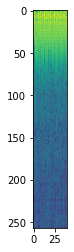

In [297]:
ID=4
plt.imshow(np.load('Preproces/data/4.npy'))
np.load('Preproces/label/4.npy')
print(np.load('Preproces/data/4.npy').shape)
#print(np.load('Preproces/data/' + str(int(ID)) + '.npy'))

-21.728802613887996


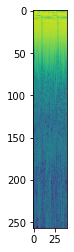

In [6]:
print(np.max(training_generator.__getitem__(4)[0][5]))
plt.imshow(training_generator.__getitem__(4)[0][5])

In [12]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(257,40,1)))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [13]:
history = model.fit(training_generator, validation_data=validation_generator, epochs=4)

Epoch 1/4
312/312 [==============================] - 35s 114ms/step - loss: 1.3664 - accuracy: 0.5787 - val_loss: 0.9600 - val_accuracy: 0.6149
Epoch 2/4
312/312 [==============================] - 36s 115ms/step - loss: 0.9639 - accuracy: 0.6072 - val_loss: 0.9480 - val_accuracy: 0.6079
Epoch 3/4
312/312 [==============================] - 36s 114ms/step - loss: 0.8720 - accuracy: 0.6500 - val_loss: 0.9234 - val_accuracy: 0.6280
Epoch 4/4
312/312 [==============================] - 36s 116ms/step - loss: 0.8299 - accuracy: 0.6741 - val_loss: 0.8112 - val_accuracy: 0.6794


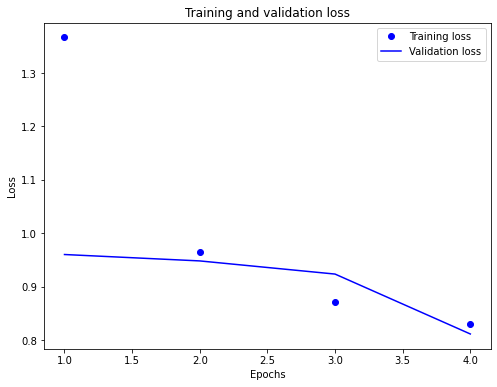

In [14]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

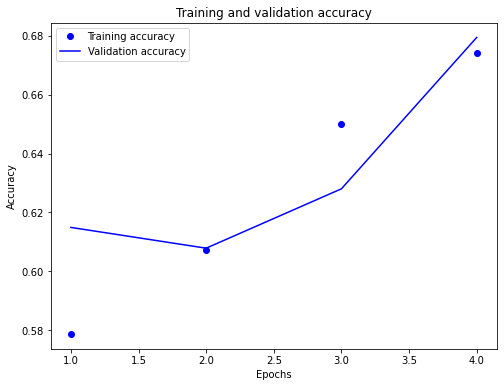

In [15]:
# Plot the accuracy curves for training and validation.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()